In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
df = pd.read_csv('/kaggle/input/facebook-live-sellers-in-thailand-uci-ml-repo/Live.csv')

In [3]:
df.head(5)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


 # Exploring The Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [5]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


In [6]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [7]:
df.columns.tolist()

['status_id',
 'status_type',
 'status_published',
 'num_reactions',
 'num_comments',
 'num_shares',
 'num_likes',
 'num_loves',
 'num_wows',
 'num_hahas',
 'num_sads',
 'num_angrys',
 'Column1',
 'Column2',
 'Column3',
 'Column4']

# Removing Unecessary Columns

In [8]:
df = df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis = 1)

In [9]:
df.head(1)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0


**Setting The status_published**

In [10]:
df['status_published'] = pd.to_datetime(df['status_published'])

In [11]:
df.head(2)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0


**In the above code we've change the time in accurate manner.**

# Checking No. of Reactions

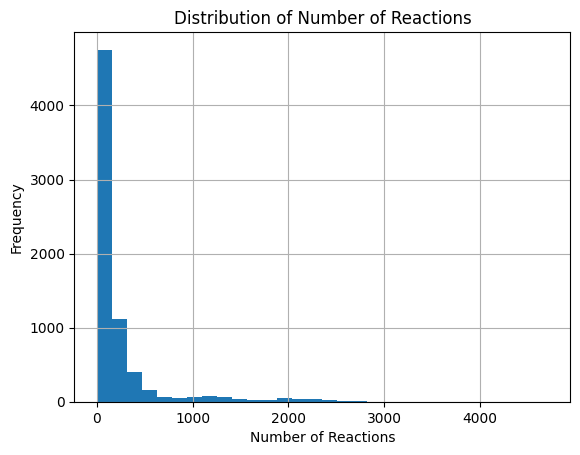

In [12]:
plt.hist(df['num_reactions'], bins = 30)
plt.xlabel('Number of Reactions')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Reactions')
plt.grid()
plt.show()


# Checking No. of Comments

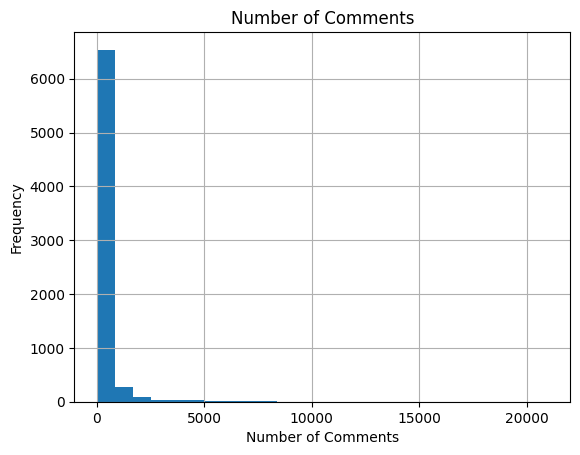

In [13]:
plt.hist(df['num_comments'], bins = 25)
plt.xlabel("Number of Comments")
plt.ylabel('Frequency')
plt.title('Number of Comments')
plt.grid()
plt.show()

# Number of Shares

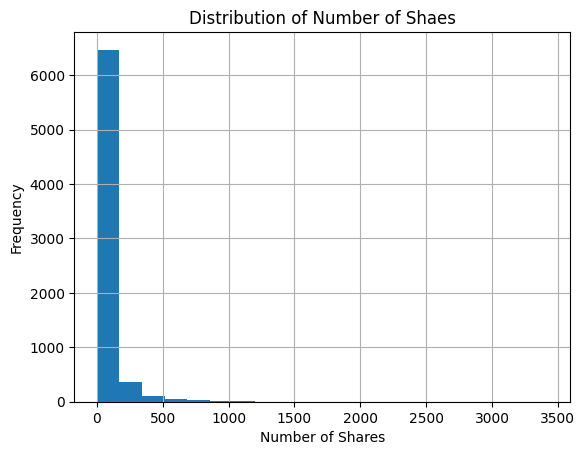

In [14]:
plt.hist(df['num_shares'], bins = 20)
plt.xlabel("Number of Shares")
plt.ylabel('Frequency')
plt.title('Distribution of Number of Shaes')
plt.grid()
plt.show()

In [15]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0


In [16]:
df.isnull().sum()

status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

# Creating Heatmap

Now It's time to create a **Heatmap** and see the relationship between **num_reaction, num_comments, num_likes and num_shares** and we will see which one is the **Highest** of all of them.

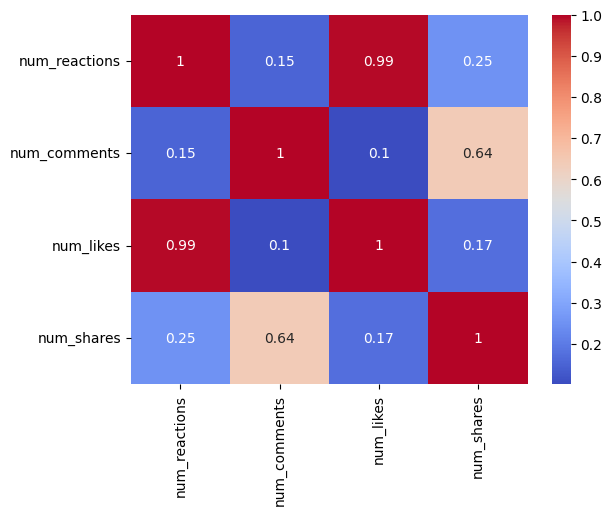

In [17]:
corr_matrix = df[['num_reactions', 'num_comments', 'num_likes', 'num_shares']].corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()

In the above **plot** you can see that **Number of Reactions** are more then others

# Comparing HaHas and Sads

Now let's **compare two emotions** one is the **num_hahas** and the second one is **num_Sads** and let see which one is more.

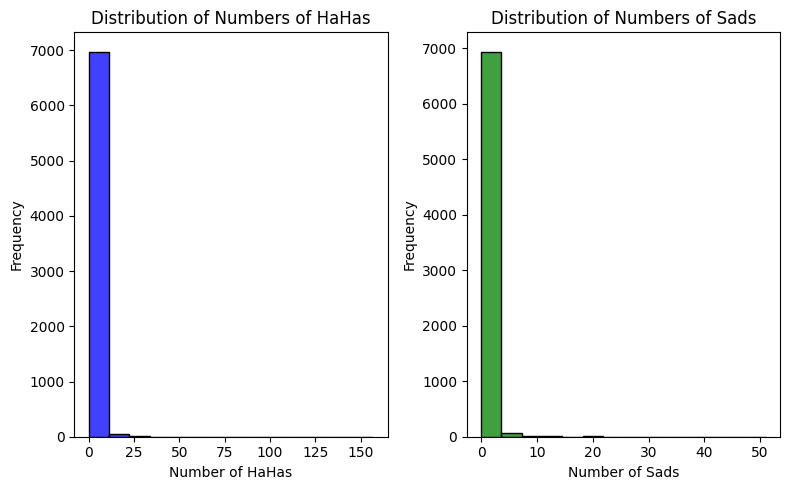

In [18]:
fig, axes = plt.subplots(1, 2, figsize = (8, 5))

sns.histplot(df['num_hahas'], ax = axes[0], color = 'blue')
axes[0].set_title('Distribution of Numbers of HaHas')
axes[0].set_xlabel('Number of HaHas')
axes[0].set_ylabel('Frequency')


sns.histplot(df['num_sads'], ax = axes[1], color = 'green')
axes[1].set_title('Distribution of Numbers of Sads')
axes[1].set_xlabel('Number of Sads')
axes[1].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

# Comparing Wows And Angrys

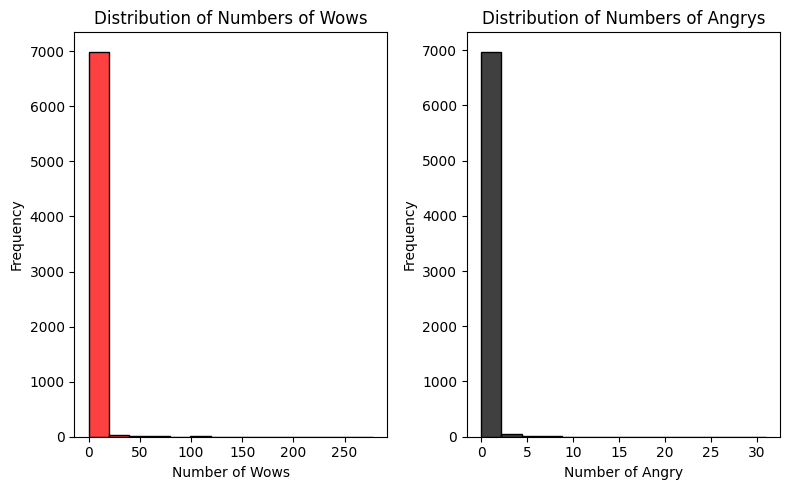

In [19]:
fig, axes = plt.subplots(1, 2, figsize = (8, 5))

sns.histplot(df['num_wows'], ax = axes[0], color = 'red')
axes[0].set_title('Distribution of Numbers of Wows')
axes[0].set_xlabel('Number of Wows')
axes[0].set_ylabel('Frequency')


sns.histplot(df['num_angrys'], ax = axes[1], color = 'black')
axes[1].set_title('Distribution of Numbers of Angrys')
axes[1].set_xlabel('Number of Angry')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Changing status_type into 0s and 1s

In [20]:
df['status_type']

0       video
1       photo
2       video
3       photo
4       photo
        ...  
7045    photo
7046    photo
7047    photo
7048    photo
7049    photo
Name: status_type, Length: 7050, dtype: object

In [21]:
df['status_type'] = df['status_type'].map({'photo': 0, 'video': 1})


In [22]:
df.head(10)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,1.0,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,0.0,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,1.0,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,0.0,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,0.0,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0
5,246675545449582_1645650162218773,0.0,2018-04-18 02:14:00,217,6,0,211,5,1,0,0,0
6,246675545449582_1645564175560705,1.0,2018-04-18 00:24:00,503,614,72,418,70,10,2,0,3
7,246675545449582_1644824665634656,1.0,2018-04-17 07:42:00,295,453,53,260,32,1,1,0,1
8,246675545449582_1644655795651543,0.0,2018-04-17 03:33:00,203,1,0,198,5,0,0,0,0
9,246675545449582_1638788379571618,0.0,2018-04-11 04:53:00,170,9,1,167,3,0,0,0,0


# Checking which one comes most (Photo Or Video)

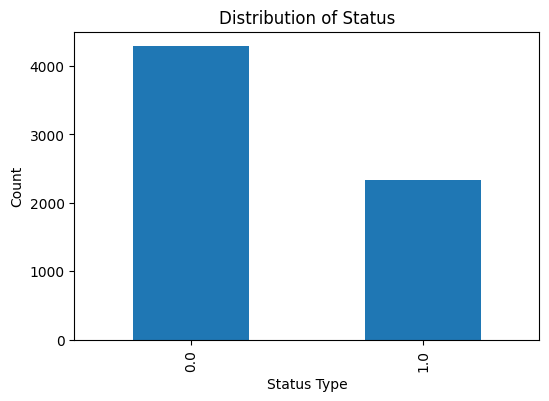

In [23]:
status_type_counts = df['status_type'].value_counts()

plt.figure(figsize = (6, 4))
status_type_counts.plot(kind = 'bar')
plt.title('Distribution of Status')
plt.xlabel('Status Type')
plt.ylabel('Count')
plt.show()

In [24]:
df.columns.tolist()

['status_id',
 'status_type',
 'status_published',
 'num_reactions',
 'num_comments',
 'num_shares',
 'num_likes',
 'num_loves',
 'num_wows',
 'num_hahas',
 'num_sads',
 'num_angrys']

# Compairing Number of Likes and Numbers of Loves

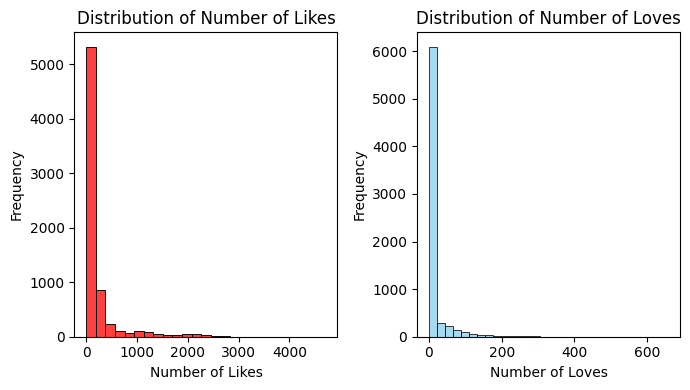

In [25]:
fig, axes = plt.subplots(1, 2, figsize = (7, 4))

sns.histplot(df['num_likes'], ax = axes[0], color = 'red', bins = 25)
axes[0].set_title('Distribution of Number of Likes')
axes[0].set_xlabel('Number of Likes')
axes[0].set_ylabel('Frequency')

sns.histplot(df['num_loves'], ax = axes[1], color = 'skyblue', bins = 30)
axes[1].set_title('Distribution of Number of Loves')
axes[1].set_xlabel('Number of Loves')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [26]:
df['status_published']

0      2018-04-22 06:00:00
1      2018-04-21 22:45:00
2      2018-04-21 06:17:00
3      2018-04-21 02:29:00
4      2018-04-18 03:22:00
               ...        
7045   2016-09-24 02:58:00
7046   2016-09-23 11:19:00
7047   2016-09-21 23:03:00
7048   2016-09-20 00:43:00
7049   2016-09-10 10:30:00
Name: status_published, Length: 7050, dtype: datetime64[ns]

In [27]:
df['status_published'] = pd.to_datetime(df['status_published'])

# Checking The Frequency of Post Each Day

**We aim to visualize the frequency of posts over Day using a line plot.**

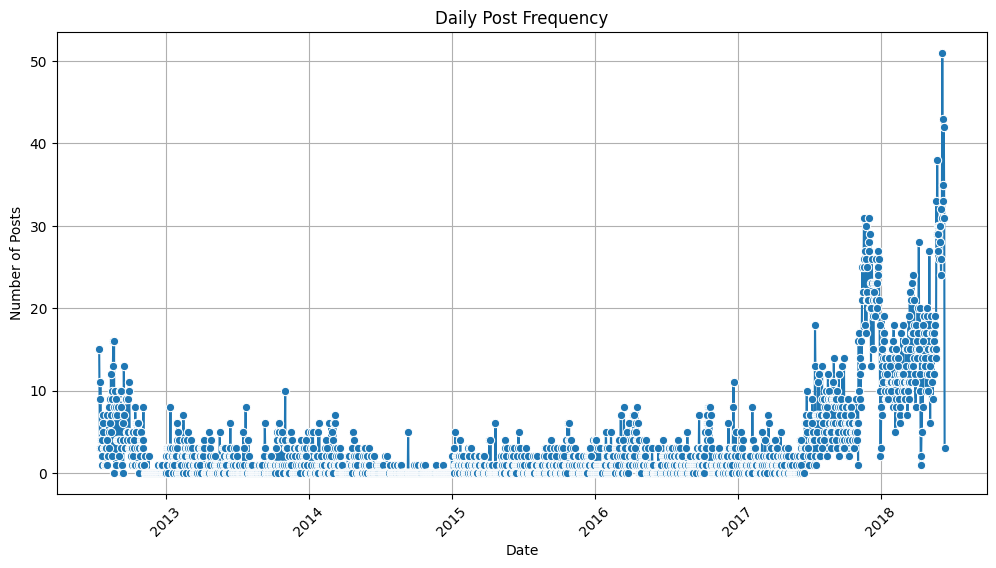

In [28]:
df.set_index('status_published', inplace = True)

df_resampled = df.resample('D').size()

plt.figure(figsize = (12, 6))
sns.lineplot(data = df_resampled, marker = 'o')
plt.title('Daily Post Frequency')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.xticks(rotation = 45)
plt.grid()
plt.show()

This code tell us the **Number Of Posts** published on each day.

And you can see **after 2018 the Numbers Of Posts Increases by Day**